# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет
1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width\*height или perimeter Некорректно будет придумать колонку width2, равную width\*2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
1. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


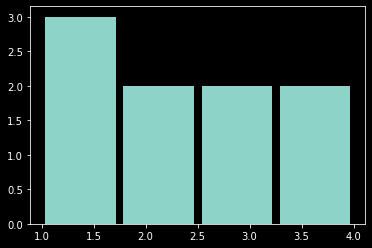

In [168]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt
import numpy

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

# 1

In [199]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import pytz

plt.style.use('dark_background')

table = pd.read_csv('user_data.csv')

print('Location nan rate:', table.location.isna().sum() / len(table.location))
print('Birthday nan rate:', table.birthday.isna().sum() / len(table.location))
print('Gender nan rate:', table.gender.isna().sum() / len(table.location))

table.drop(columns='location') # location is useless (no real data)

dataCollectionDate = pytz.UTC.localize(datetime.datetime(2020, 9, 26))

table['birthday_datetime'] = pd.to_datetime(table.birthday).map(
    lambda x: x if pd.isna(x) or 5 < relativedelta(dataCollectionDate, x).years < 89 else np.NaN,
) # filter unreasonable birthdays

table['joined_datetime'] = pd.to_datetime(table.joined)

Location nan rate: 0.3284738041002278
Birthday nan rate: 0.4255125284738041
Gender nan rate: 0.20227790432801823


Text(0.5, 1.0, 'Age distribution of "Serial Experiments Lain" viewers')

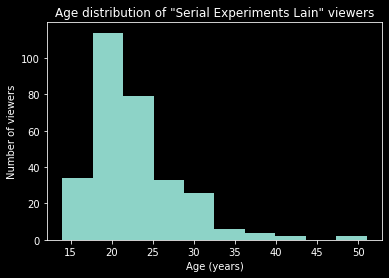

In [170]:
def calculate_age(birthdays):
    return birthdays.dropna().map(
        lambda x: relativedelta(dataCollectionDate, x).years
    )
plt.hist(calculate_age(
    table\
    [table.watched.str.contains("'Serial Experiments Lain'")] \
    .birthday_datetime
))
plt.xlabel('Age (years)')
plt.ylabel('Number of viewers')
plt.title('Age distribution of "Serial Experiments Lain" viewers')

C:\Users\nh5\AppData\Local\Temp/ipykernel_14128/2474287079.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[(data <= data.quantile(0.95)) & (data >= data.quantile(0.05))]


Text(0.5, 1.0, 'Days watched of user mean score')

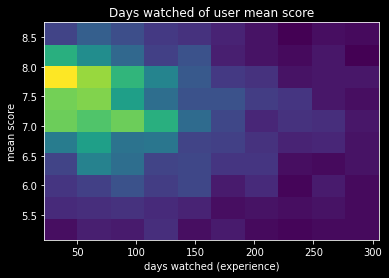

In [171]:
from functools import reduce

def filter_data(table, data):
    return table[(data <= data.quantile(0.95)) & (data >= data.quantile(0.05))]
def filter_table(table, *args):
    return reduce(filter_data, args, table)

filtered = filter_table(table, table.days_watched, table.mean_score)
plt.hist2d(filtered.days_watched, filtered.mean_score)
plt.xlabel('days watched (experience)')
plt.ylabel('mean score')
plt.title('Days watched of user mean score')

In [206]:
import sys
!{sys.executable} -m pip install json5

import json5

def mapper(x):
    genres = json5.loads(x)
    return genres["Hentai"], genres["Harem"]
# f, s = zip(*table.genre_count.map(mapper))

You should consider upgrading via the 'c:\users\nh5\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Text(0.5, 1.0, 'Joined date (y) of mean score (x)')

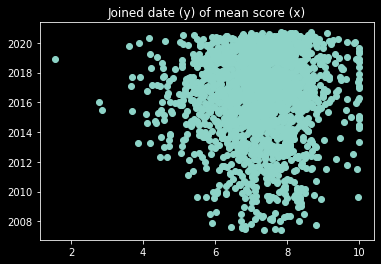

In [208]:
filtered = table[table.mean_score != 0]
plt.scatter(filtered.mean_score, filtered.joined_datetime)
plt.title('Joined date (y) of mean score (x)')

Text(0.5, 1.0, 'User age (years)')

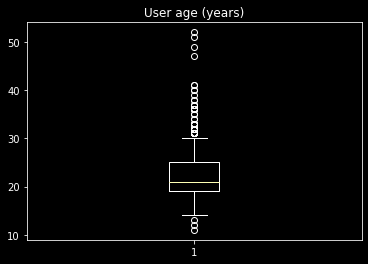

In [174]:
plt.boxplot(calculate_age(table.birthday_datetime), whis=0.95)
plt.title("User age (years)")

Text(0.5, 1.0, 'Users joined per year')

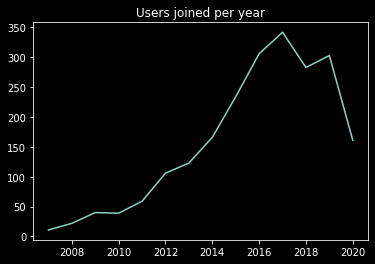

In [175]:
plt.plot(pd.to_datetime(table.joined).dt.year.value_counts().sort_index())
plt.title('Users joined per year')

C:\Users\nh5\AppData\Local\Temp/ipykernel_14128/2474287079.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[(data <= data.quantile(0.95)) & (data >= data.quantile(0.05))]
C:\Users\nh5\AppData\Local\Temp/ipykernel_14128/2474287079.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[(data <= data.quantile(0.95)) & (data >= data.quantile(0.05))]


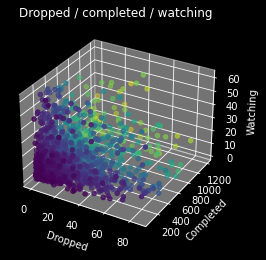

In [188]:
fig = plt.figure()
ax = plt.axes(projection='3d')
filtered = filter_table(table, table.dropped, table.completed, table.watching)
ax.scatter(filtered.dropped, filtered.completed, filtered.watching, c=filtered.completed)
ax.set_title('Dropped / completed / watching')
ax.set_xlabel('Dropped')
ax.set_ylabel('Completed')
ax.set_zlabel('Watching')
plt.show()

In [177]:
table.to_csv('output.csv')

In [178]:
table['Drop rate'] = table.dropped / table.total_entries

# 2
[Метод Лагранжа](https://github.com/scipy/scipy/blob/fe319a872faf3dca80261216b38e14297c879abd/scipy/interpolate/interpolate.py#L81)

Text(0.5, 1.0, 'Lagrange interpolation')

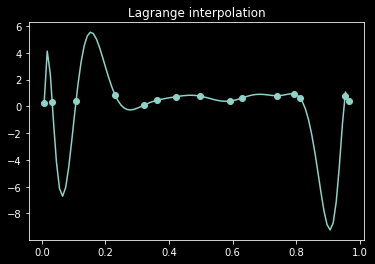

In [179]:
import scipy.interpolate

nPts = 15
x,y = np.random.uniform(0, 1, nPts),np.random.uniform(0, 1, nPts)

poly = scipy.interpolate.lagrange(x, y)
args = np.linspace(min(x), max(x), 100)

plt.scatter(x, y)
plt.plot(args, poly(args))
plt.title('Lagrange interpolation')

65.7783843501057 -0.9639733613932373 0.2896203350749692
-34.78309747621657 5.599007477567253 0.1825397792043015
47.6813283536946 -12.119702030891379 1.1343219067264536
-195.84496599703652 99.81733464264757 -11.728662984350038
915.0568375475597 -615.8091349972535 103.52032716383943
-648.2034496495271 511.4696676022907 -99.70198795502037
474.2370745373405 -434.831288116688 99.74855741872486
-423.30331792954155 456.8252521717331 -121.70425754983741
1349.3853749272985 -1640.9305427969323 498.9037760345455
-492.74649843296646 675.7640567188176 -229.47429844544064
1058.8500938421935 -1618.7083750821648 618.7815830293699
-3573.673625933701 5717.367166618359 -2285.57507054759
649.9974389668188 -1146.3393095600316 502.90359334683404
-10622.381678361282 20329.002561064364 -9725.423179109794


Text(0.5, 1.0, 'Quadratic spline interpolation')

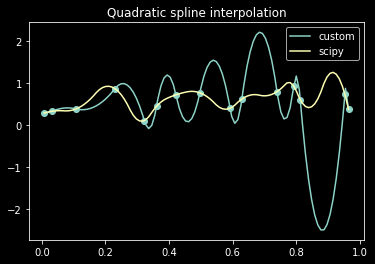

In [180]:
from itertools import tee
import scipy.interpolate

def pairwise(iterable):
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def quadratic_spline(x, y):
    if len(x) == 0:
        return lambda _: np.NaN;

    pts = sorted(zip(x, y))
    params = []
    a0,b0=0,0
    for (x1,y1),(x2,y2) in pairwise(pts):
        x1s = x1**2
        dx = x2 - x1
        dy = y2 - y1
        dx2 = x2**2 - x1s
        denom = dx ** 2
        adder = 2 * a0 * x1 + b0
        a = -y1 + y2 - dx * adder
        b = dx2 * adder - 2 * x1 * dy
        c = (denom - x1s) * y1 + x1s * y2 - x1 * x2 * dx * adder
        a /= denom
        b /= denom
        c /= denom
        params.append((a, b, c))
        a0 = a
        b0 = b
        print(a, b, c)
    def interpolate(x):
        if x < pts[0][0] or x > pts[-1][0]:
            return np.NaN
        if x == pts[-1][0]:
            return pts[-1][1]
        l, r = 0, len(pts) # x_l <= x < x_r
        while r - l > 1:
            m = (l + r) // 2
            if pts[m][0] <= x:
                l = m
            else:
                r = m
        a,b,c = params[l]
        return a * x**2 + b * x + c
    return interpolate

plt.plot(args, np.vectorize(quadratic_spline(x, y))(args), label='custom')
plt.scatter(x, y)
plt.plot(args, scipy.interpolate.interp1d(x, y, 'quadratic')(args), label='scipy')
plt.legend()
plt.title('Quadratic spline interpolation')

# 3

In [181]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    nparr = np.array(array)
    start, finish = nparr.min(), nparr.max()
    dx = finish - start
    bin_half_size = dx / bins / 2
    counts = np.zeros(bins)
    numpy.add.at(counts, np.minimum(((nparr - start) / dx * bins).astype(int), bins - 1), 1)
    return (list(np.linspace(start + bin_half_size, finish - bin_half_size, bins)),
            list(counts))

    # start, finish = min(array), max(array)
    # dx = finish - start
    # bin_half_size = dx / bins / 2
    # counts = [0 for _ in range(bins)]
    # for el in array:
    #     counts[min(int((el - start) / dx * bins), bins - 1)] += 1
    # return (list(start + bin_half_size * (2 * i + 1) for i in range(bins)),
    #         counts)

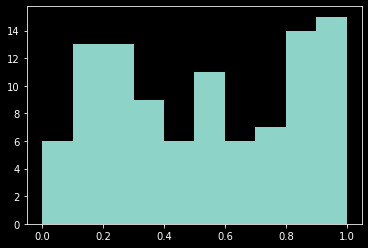

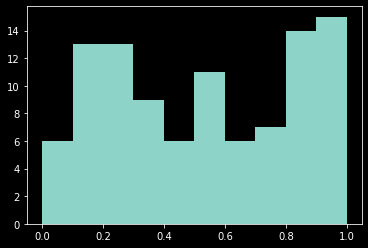

In [182]:
samples = np.random.uniform(size=100)
nBins = 10
plt.bar(*fast_hist(samples, nBins), width=0.1)
plt.show()
plt.hist(samples, bins=nBins)
plt.show()

Custom histogram:
3.16 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Library histogram:
3.23 ms ± 29.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


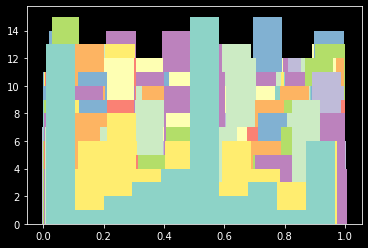

In [191]:
def make_custom_hist(samples, nBins):
    return plt.bar(*fast_hist(samples, nBins), width=1/nBins)
def make_lib_hist(samples, nBins):
    return plt.hist(samples, bins=nBins)
def benchmark(maker, size, nBins):
    return maker(np.random.uniform(size=size), nBins)
nSamples = 50
nBins = 10
print('Custom histogram:')
%timeit benchmark(make_custom_hist, nSamples, nBins)
print('Library histogram:')
%timeit benchmark(make_lib_hist, nSamples, nBins)